* 전이학습(transfer learning): 학습된 모델을 가져와 활용하는 것
* 지도학습(supervised learning)
* 비지도학습(unsupervised learning)

### 머신러닝 개인 조사자료
 머신러닝에는 지도학습, 비지도학습 그리고 강화학습이 있다. 지도학습은 양질의 레이블된 데이터들을 이용하여 트레이닝 시킨다. 서로 비슷한 종류끼리 구별하는 '분류', 어떤 조건에 필요한 수치를 구하는 '회귀' 그리고 시간에 따라 예측을 하는 '예측'이 있다. 비지도학습은 레이블되지 않는 데이터들을 가지고 훈련하는 것으로 데이터간 특성/특징과 패턴/차이점을 구별한다. 데이터들 중 'anomaly'를 찾는 '이상값 감지'와 서로 비슷한 데이터을 묶는 '그룹화'가 있다. 마지막으로 강화학습에는 에이전트가 주어진 환경에 특정 액션을 취하면 환경의 변화를 확인하여 목표치와 비슷해지면 그에 따른 보상을 받게한다. 그렇게 반복되는 액션들이 데이터들이 되고, 점점 목표치에 가까워지게 액션을 하도록 훈련시키는 것이다.

1번

1.머신러닝에는 지도학습과 비지도학습 두가지 방식이 있다.

2.지도학습은 'ML' & 'labeled data sets' 을 이용하여 데이터를 분류하거나 예측하는 알고리즘을 훈련 할 수 있고, 다른 유형으로는 입력값과 가충치등 함수를 이용한 'regression'이 있다

3.머신러닝알고리즘을 이용해 'unlabeled data sets'을 'clustering'하여 비지도학습을 할 수 있다.

 

2번

1.머신러닝은 구조화된 레이블이 지정된 데이터에 가중치를 이용하는 것이다.

2.딥러닝에는 데이터레이블을 사용하는 지도학습과 데이터레이블이 없어도 클러스터링을 이용한 비지도학습이 있다.

3.대부분 딥뉴런네트워크는 피드포워드이다. 그러나 백프로파게이션으로 모델을 훈련할수도있다.

# 치매 환자의 뇌인지 일반인의 뇌인지 예측하기

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras import optimizers

import matplotlib.pyplot as plt
import numpy as np

In [3]:
!git clone https://github.com/taehojo/data-ch20.git

Cloning into 'data-ch20'...
remote: Enumerating objects: 265, done.
remote: Counting objects: 100% (265/265), done.
remote: Compressing objects: 100% (265/265), done.
remote: Total 265 (delta 0), reused 265 (delta 0), pack-reused 0
Receiving objects: 100% (265/265), 1.86 MiB | 3.97 MiB/s, done.


In [6]:
# 학습셋의 변형을 설정
train_datagen = ImageDataGenerator(rescale=1./255,          # 주어진 이미지의 크기를 설정합니다.
                                  horizontal_flip=True,     # 수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
                                  width_shift_range=0.1,    # 전체 크기의 15% 범위에서 좌우로 이동합니다.
                                  height_shift_range=0.1,   # 마찬가지로 위, 아래로 이동합니다.
                                  #rotation_range=5,        # 정해진 각도만큼 회전시킵니다.
                                  #shear_range=0.7,         # 좌표 하나를 고정시키고 나머지를 이동시킵니다.
                                  #zoom_range=1.2,          # 확대 또는 축소시킵니다.
                                  #vertical_flip=True,      # 수직 대칭 이미지를 만듭니다.
                                  #fill_mode='nearest'      # 빈 공간을 채우는 방법입니다. nearest 옵션은 가장 비슷한 색으로 채우게 됩니다.
                                  )

train_generator = train_datagen.flow_from_directory(
       '/content/data-ch20/train',   # 학습셋이 있는 폴더의 위치
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

# 테스트셋은 이미지 부풀리기 과정을 진행하지 않습니다.
test_datagen = ImageDataGenerator(rescale=1./255)  

test_generator = test_datagen.flow_from_directory(
       '/content/data-ch20/test',   # 테스트셋이 있는 폴더의 위치
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')


# 앞서 배운 CNN 모델을 만들어 적용해 보겠습니다.
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36,

In [7]:
# ! pip install Scipy

In [8]:
#모델 실행의 옵션을 설정합니다. 
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

#모델을 실행합니다
history = model.fit(
       train_generator,
       epochs=100,
       validation_data=test_generator,
       validation_steps=10, 
       callbacks=[early_stopping_callback])

Epoch 1/100
32/32 [==============================] - 8s 204ms/step - loss: 0.7032 - accuracy: 0.4437 - val_loss: 0.6885 - val_accuracy: 0.6400
Epoch 2/100
32/32 [==============================] - 6s 193ms/step - loss: 0.6924 - accuracy: 0.5063 - val_loss: 0.6877 - val_accuracy: 0.4800
Epoch 3/100
32/32 [==============================] - 6s 192ms/step - loss: 0.6795 - accuracy: 0.5875 - val_loss: 0.6731 - val_accuracy: 0.6800
Epoch 4/100
32/32 [==============================] - 6s 190ms/step - loss: 0.6970 - accuracy: 0.5250 - val_loss: 0.6725 - val_accuracy: 0.7000
Epoch 5/100
32/32 [==============================] - 8s 243ms/step - loss: 0.6766 - accuracy: 0.6125 - val_loss: 0.6578 - val_accuracy: 0.7800
Epoch 6/100
32/32 [==============================] - 6s 191ms/step - loss: 0.6487 - accuracy: 0.6125 - val_loss: 0.6325 - val_accuracy: 0.6800
Epoch 7/100
32/32 [==============================] - 6s 191ms/step - loss: 0.6105 - accuracy: 0.7250 - val_loss: 0.5885 - val_accuracy: 0.7200

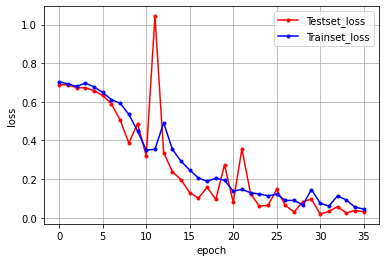

In [9]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Trainset_loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()